In [7]:
%reload_ext autoreload

In [8]:
%autoreload 2

In [9]:
import pandas as pd # data analysis toolkit - create, read, update, delete datasets
import numpy as np #matrix math
from sklearn.model_selection import train_test_split #to split out training and testing data 
#for command line arguments
import argparse
#for reading files
import os
#for ploting graph
import matplotlib.pyplot as plt
import timeit
import math

In [11]:
import nbimporter # pip install nbimporter
import utils as utils
import importlib
importlib.reload(utils)

Importing Jupyter notebook from utils.ipynb


<module 'utils' from 'utils.ipynb'>

In [12]:
def load_data(folder_name, test_size_value=0.4):
    """
    Load training data and split it into training and validation set
    """
    #reads CSV file into a single dataframe variable
    data_df = pd.read_csv(os.path.join('..', '_out', folder_name, 'train_3/data.csv'))

    #yay dataframes, we can select rows and columns by their names
    #we'll store the camera images as our input data
    X = data_df[['image_path', 'speed', 'high_level_command']].values
    #and our steering commandas as our output data
    Y = data_df[['throttle', 'steering_angle', 'brake']].values
    
    X_lanefollow = []
    X_straight = []
    X_left = []
    X_right = []
    
    Y_lanefollow = []
    Y_straight = []
    Y_left = []
    Y_right = []
    
    X_image_path = X[:, 0]
    index = 0
    for path in X_image_path:
        path = path.split('/')
        if path[3] == 'lanefollow':
            X_lanefollow.append(X[index])
            Y_lanefollow.append(Y[index])
        elif path[3] == 'straight':
            X_straight.append(X[index])
            Y_straight.append(Y[index])
        elif path[3] == 'left':
            X_left.append(X[index])
            Y_left.append(Y[index])
        elif path[3] == 'right':
            X_right.append(X[index])
            Y_right.append(Y[index])
        index += 1
        
    X_lanefollow = np.array(X_lanefollow)
    X_straight = np.array(X_straight)
    X_left = np.array(X_left)
    X_right = np.array(X_right)
    
    Y_lanefollow = np.array(Y_lanefollow)
    Y_straight = np.array(Y_straight)
    Y_left = np.array(Y_left)
    Y_right = np.array(Y_right)
    # we're going to use all training data so, we will use only len(X_train) * 40 / 60 of validating data
    # so, our ratio is going to be 60% for training set and 40% for validation set and for testing
    # we're going to test in the simulation environment which is town01
    X_train_lanefollow, X_valid_lanefollow, Y_train_lanefollow, Y_valid_lanefollow = train_test_split(X_lanefollow, Y_lanefollow, test_size=0.4, random_state=2)
    X_train_straight, X_valid_straight, Y_train_straight, Y_valid_straight         = train_test_split(X_straight, Y_straight, test_size=0.4, random_state=1)
    X_train_left, X_valid_left, Y_train_left, Y_valid_left                         = train_test_split(X_left, Y_left, test_size=0.4, random_state=1)
    X_train_right, X_valid_right, Y_train_right, Y_valid_right                     = train_test_split(X_right, Y_right, test_size=0.4, random_state=1)
    
    X_train = [X_train_lanefollow, X_train_straight, X_train_left, X_train_right]
    Y_train = [Y_train_lanefollow, Y_train_straight, Y_train_left, Y_train_right]
    
    X_valid = [X_valid_lanefollow, X_valid_straight, X_valid_left, X_valid_right]
    Y_valid = [Y_valid_lanefollow, Y_valid_straight, Y_valid_left, Y_valid_right]
    
    print('X_train shape = (%d, %d)'% ((X_train[0].shape[0] + X_train[1].shape[0] + X_train[2].shape[0] + X_train[3].shape[0]), 4))
    print('Y_train shape = (%d, %d)'% ((Y_train[0].shape[0] + Y_train[1].shape[0] + Y_train[2].shape[0] + Y_train[3].shape[0]), 4))
    print('X_valid shape = (%d, %d)'% ((X_valid[0].shape[0] + X_valid[1].shape[0] + X_valid[2].shape[0] + X_valid[3].shape[0]), 4))
    print('Y_valid shape = (%d, %d)'% ((Y_valid[0].shape[0] + Y_valid[1].shape[0] + Y_valid[2].shape[0] + Y_valid[3].shape[0]), 4))

    return X_train, X_valid, Y_train, Y_valid

In [13]:
X_train, X_valid, Y_train, Y_valid = load_data('no_obstacle_no_traffic')
X_train

X_train shape = (50869, 4)
Y_train shape = (50869, 4)
X_valid shape = (33917, 4)
Y_valid shape = (33917, 4)


[array([['_out/no_obstacle_no_traffic/train_3/lanefollow/images/000385357.jpg',
         21.151344628228387, 4],
        ['_out/no_obstacle_no_traffic/train_3/lanefollow/images/000820628.jpg',
         18.009060832985984, 4],
        ['_out/no_obstacle_no_traffic/train_3/lanefollow/images/000820864.jpg',
         19.613296185650828, 4],
        ...,
        ['_out/no_obstacle_no_traffic/train_3/lanefollow/images/000007560.jpg',
         19.31933949837787, 4],
        ['_out/no_obstacle_no_traffic/train_3/lanefollow/images/000003095.jpg',
         19.012497895970107, 4],
        ['_out/no_obstacle_no_traffic/train_3/lanefollow/images/000820080.jpg',
         20.485689075113186, 4]], dtype=object),
 array([['_out/no_obstacle_no_traffic/train_3/straight/images/000313136.jpg',
         20.01316763623032, 3],
        ['_out/no_obstacle_no_traffic/train_3/straight/images/000817088.jpg',
         21.06122131595463, 4],
        ['_out/no_obstacle_no_traffic/train_3/straight/images/000153480.jp

# Dataset RGB Image 
image size = 66 x 200

Output filename = _out/no_obstacle_no_traffic/train_3/lanefollow/images/000385357.jpg


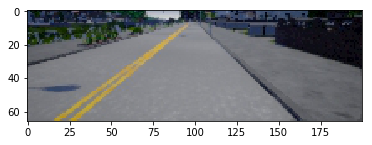

In [14]:
print("Output filename = %s" % X_train[0][0][0])
image = utils.load_image(X_train[0][0][0])
utils.show_image(image)

## Data Argmentation (For Center-camera image)

### 1. Brightness Augmentation
Brightness is randomly changed to simulate different light
conditions. We generate augmented images with different
brightness by first converting images to HSV, scaling up or
down the V channel and converting back to the RGB channel.
Following are typical augmented images.

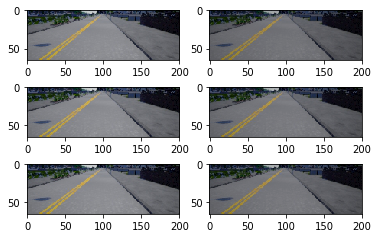

In [15]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    utils.show_image(image)
    random_brightness = utils.random_brightness(image)
    plt.subplot(num_samples,2,i+2+j)
    random_brightness = utils.random_brightness(image)
    utils.show_image(random_brightness)
plt.show()

### 2. Contrast Augmentation

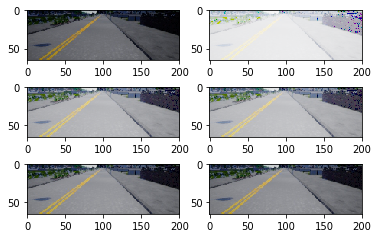

In [16]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_contrast = utils.random_contrast(image)
    utils.show_image(random_contrast)
    plt.subplot(num_samples,2,i+2+j)
    random_contrast = utils.random_contrast(image)
    utils.show_image(random_contrast)
plt.show()

### 3. Sharpen Augmentation

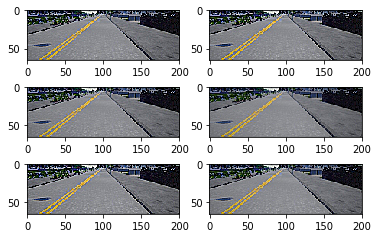

In [17]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_sharpen = utils.random_sharpen(image)
    utils.show_image(random_sharpen)
    plt.subplot(num_samples,2,i+2+j)
    random_sharpen = utils.random_sharpen(image)
    utils.show_image(random_sharpen)
plt.show()

### 4. Addition Augmentation

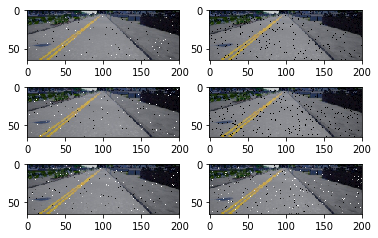

In [18]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_addition_augment = utils.random_addition_augment(image)
    utils.show_image(random_addition_augment)
    plt.subplot(num_samples,2,i+2+j)
    random_addition_augment = utils.random_addition_augment(image)
    utils.show_image(random_addition_augment)
plt.show()

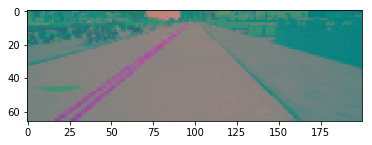

In [19]:
utils.show_image(utils.preprocess(image))

## Preprocessing

### 1. RGB -> YUV

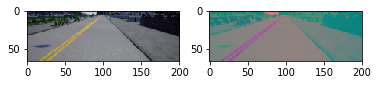

In [20]:
num_samples = 1

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    utils.show_image(image)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(image)
    utils.show_image(preprocess)
plt.show()

### 2. Brightness Augmentation-> YUV

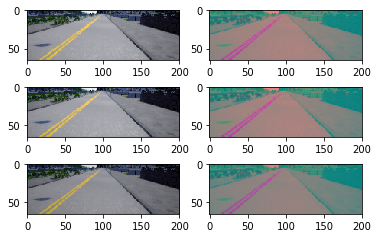

In [21]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_brightness = utils.random_brightness(image)
    utils.show_image(random_brightness)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(random_brightness)
    utils.show_image(preprocess)
plt.show()

### 3. Contrast Argumentation -> YUV

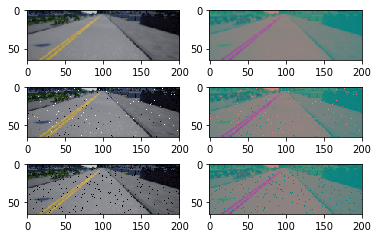

In [22]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_contrast = utils.random_addition_augment(image)
    utils.show_image(random_contrast)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(random_contrast)
    utils.show_image(preprocess)
plt.show()

### 4. Additional Augmentation -> YUV

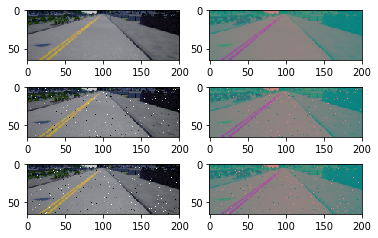

In [23]:
num_samples = 3

for i,j in zip(range(num_samples), range(num_samples)):
    plt.subplot(num_samples,2,i+1+j)
    random_addition_augment = utils.random_addition_augment(image)
    utils.show_image(random_addition_augment)
    plt.subplot(num_samples,2,i+2+j)
    preprocess = utils.preprocess(random_addition_augment)
    utils.show_image(preprocess)
plt.show()